In [1]:
'''
Programming Team : Oktawian Filipkowski, Maciej Zakrzewski
Exercise 4: Propose and solve problem with neural network.
We will teach our neural network to different between baclava and ceviche.
BONUS:
We will use our manually created dataset, which is based on food-101 dataset
Link: https://gofile.io/d/I5MWWt
Lets start with the usual, importing.
'''
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
'''
After downloading our file, we need to unzip it
'''
zip_ref = zipfile.ZipFile("zfoodzip.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [3]:
'''
Now we need to check it's contents
'''
for dirpath, dirnames, filenames in os.walk("zfood"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'zfood'.
There are 2 directories and 0 images in 'zfood/train'.
There are 0 directories and 750 images in 'zfood/train/baklava'.
There are 0 directories and 750 images in 'zfood/train/ceviche'.
There are 2 directories and 0 images in 'zfood/test'.
There are 0 directories and 250 images in 'zfood/test/baklava'.
There are 0 directories and 250 images in 'zfood/test/ceviche'.


In [4]:
'''
Since we know what our dataset contains, we will now get class names for it
'''
data_dir = pathlib.Path("zfood/train/") 
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['baklava' 'ceviche']


In [5]:
'''
As with previous 2 exercises, we will now print random image and its shape
'''
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") 

  return img

Image shape: (512, 512, 3)


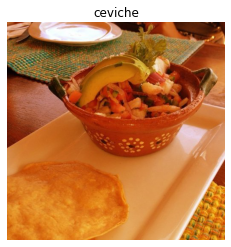

In [6]:
p_num = random.choice(range(1,3))

if p_num == 1:
    p = "baklava"
else:
    p = "ceviche"
    
img = view_random_image(target_dir="zfood/train/",
                        target_class=p)

In [7]:
'''
As with previous exercises, we will preprocess the data
but this time we need to set train and test directories manually
since this dataset its not "made to go", we will also convert all images to one
size.
'''
tf.random.set_seed(42)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "zfood/train/"
test_dir = "zfood/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="binary", 
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [8]:
'''
Now we create our model
'''
food_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, 
                         activation="relu", 
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, 
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), 
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") 
])

In [9]:
'''
Compiling model and creating history model for visualization
'''
food_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
food_1_plot = food_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 21s 340ms/step - loss: 0.6671 - accuracy: 0.5940 - val_loss: 0.6749 - val_accuracy: 0.5340
Epoch 2/5
47/47 [==============================] - 9s 192ms/step - loss: 0.5939 - accuracy: 0.7027 - val_loss: 0.6634 - val_accuracy: 0.6900
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.5185 - accuracy: 0.7420 - val_loss: 0.5635 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4386 - accuracy: 0.8053 - val_loss: 0.5600 - val_accuracy: 0.7520
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3732 - accuracy: 0.8453 - val_loss: 0.7160 - val_accuracy: 0.6620


In [10]:
'''
Accuracy is about 70%, which is not bad.
Let's check properties of our model
'''
food_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [11]:
'''
Let's check another model for its accuracy
'''
tf.random.set_seed(42)

food_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), 
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

food_2.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

food_2_plot = food_2.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 5.5977 - accuracy: 0.5240 - val_loss: 0.9123 - val_accuracy: 0.6280
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 1.1577 - accuracy: 0.5873 - val_loss: 0.6740 - val_accuracy: 0.6240
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 1.1793 - accuracy: 0.5893 - val_loss: 0.7177 - val_accuracy: 0.6540
Epoch 4/5
47/47 [==============================] - 9s 194ms/step - loss: 0.7889 - accuracy: 0.6500 - val_loss: 0.7751 - val_accuracy: 0.6060
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.7229 - accuracy: 0.6680 - val_loss: 0.6627 - val_accuracy: 0.6360


In [12]:
'''
As we can see, results are bad, lets check its properties
'''
food_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 100)               15052900  
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


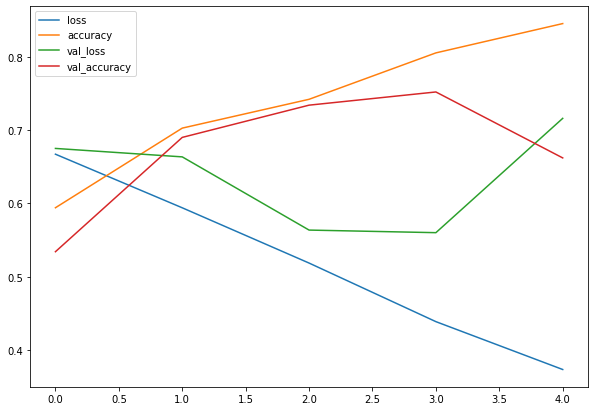

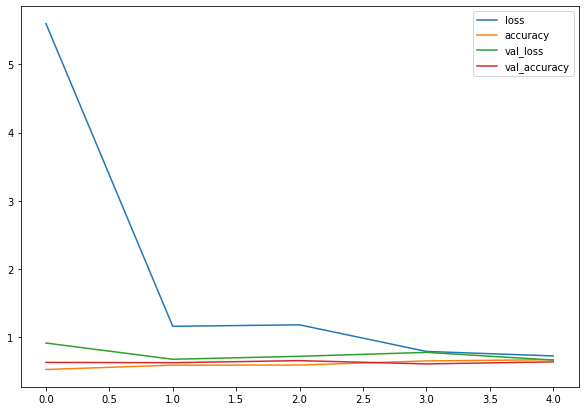

In [13]:
'''
As we can see, even though model_2 has much more params its still
performs much worse than previous one.
Increasing model complexity is not always a way to increase its effectivness.
Lets create visualization
'''
pd.DataFrame(food_1_plot.history).plot(figsize=(10, 7));
pd.DataFrame(food_2_plot.history).plot(figsize=(10, 7));


--2022-12-15 17:09:20--  https://niecodziennikpary.pl/wp-content/uploads/2017/09/baklava.jpg
Resolving niecodziennikpary.pl (niecodziennikpary.pl)... 5.252.229.55
Connecting to niecodziennikpary.pl (niecodziennikpary.pl)|5.252.229.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86298 (84K) [image/jpeg]
Saving to: ‘baklava.jpg.1’

baklava.jpg.1       100%[===================>]  84.28K   198KB/s    in 0.4s    

2022-12-15 17:09:21 (198 KB/s) - ‘baklava.jpg.1’ saved [86298/86298]



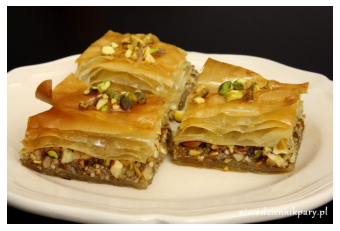

In [14]:
'''
Now lets try to make predictions with our model
First lets download image from internet
'''
!wget https://niecodziennikpary.pl/wp-content/uploads/2017/09/baklava.jpg
baklava = mpimg.imread("baklava.jpg")
plt.imshow(baklava)
plt.axis(False);

In [15]:
'''
Lets check the shape
'''
baklava.shape

(427, 640, 3)

In [16]:
'''
Now use function to resize and reshape our image
'''
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [17]:
'''
Function to make prediction with image
'''
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 191ms/step


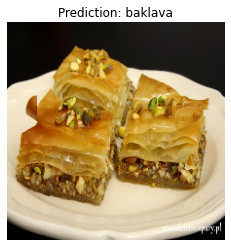

In [18]:
pred_and_plot(food_1, "baklava.jpg", class_names)

--2022-12-15 17:09:22--  https://iamhomesteader.com/wp-content/uploads/2020/12/shrimp-ceviche-3.jpg
Resolving iamhomesteader.com (iamhomesteader.com)... 104.18.1.2, 104.18.0.2, 2606:4700::6812:2, ...
Connecting to iamhomesteader.com (iamhomesteader.com)|104.18.1.2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73628 (72K) [image/jpeg]
Saving to: ‘shrimp-ceviche-3.jpg.1’

shrimp-ceviche-3.jp 100%[===================>]  71.90K  --.-KB/s    in 0.001s  

2022-12-15 17:09:22 (54.8 MB/s) - ‘shrimp-ceviche-3.jpg.1’ saved [73628/73628]

1/1 [==============================] - 0s 19ms/step


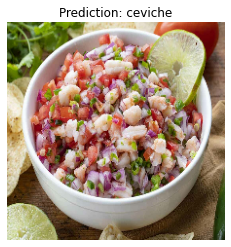

In [19]:
'''
To be sure let's try another pic
'''
!wget https://iamhomesteader.com/wp-content/uploads/2020/12/shrimp-ceviche-3.jpg
pred_and_plot(food_1, "shrimp-ceviche-3.jpg", class_names)

1/1 [==============================] - 0s 15ms/step


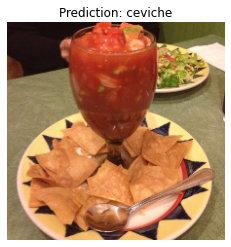

In [20]:
'''
And random one from our dataset
'''
random_direct = random.choice(os.listdir(f"zfood/train/"))
random_food = random.choice(os.listdir(f"zfood/train/{random_direct}"))
pred_and_plot(food_1, f"zfood/train/{random_direct}/{random_food}" , class_names)